In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
#loading data
train=pd.read_csv(r'C:\Users\shashank\Desktop\Big Market Sales\trainset.csv')
test=pd.read_csv(r'C:\Users\shashank\Desktop\Big Market Sales\testset.csv')
train['born']='train'
test['born']='test'

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,born
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,born
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [5]:
combined = pd.concat([train, test],ignore_index=True,sort=False)

In [6]:
combined.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#lets have a look at total missing values in each column
combined.apply(lambda x:x.isnull().sum())

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
born                            0
dtype: int64

In [8]:
#lets have a look at unique values in each columns
combined.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
born                             2
dtype: int64

In [9]:
#Above values shows we have a total of 10 outlets and 1559 products.

'Following plot reveals that there are many mismatch of data.\n   Low Fat,low fat,LF refers to the same thing and Regular and \n   reg are same thing'

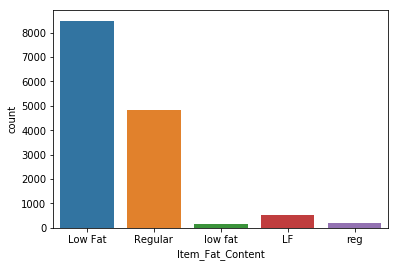

In [10]:
#let us have a look at Fat Content values and there Distributions
sns.countplot(combined['Item_Fat_Content'])
'''Following plot reveals that there are many mismatch of data.
   Low Fat,low fat,LF refers to the same thing and Regular and 
   reg are same thing'''

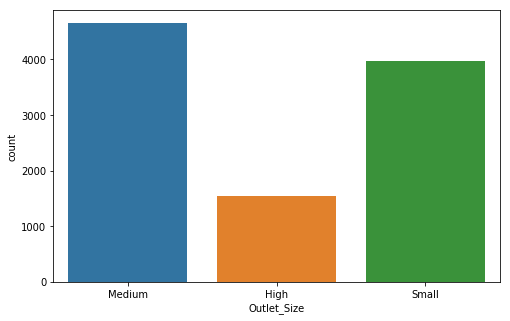

In [11]:
#lets have a look at various outlet sizes
plt.figure(figsize=(8,5))
sns.countplot(combined['Outlet_Size'])
#The distribution seems normal.

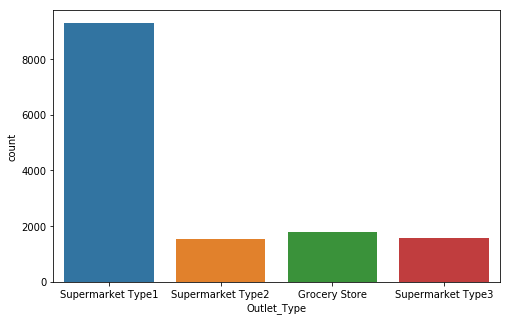

In [12]:
#lets have a look at various outlet types
plt.figure(figsize=(8,5))
sns.countplot(combined['Outlet_Type'])

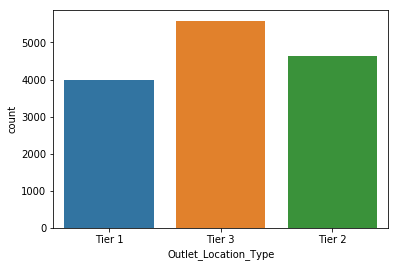

In [13]:
#lets haave a look at various Locations where outlet is present
sns.countplot(combined['Outlet_Location_Type'])

In [14]:
#Now lets look at various item type present in stores
combined['Item_Type'].value_counts()
#It looks like we can combine some types to give better results.

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [15]:
'''Now lets focus on handling the missing values and tuning our data
   to apply machine learning techniques.'''

'Now lets focus on handling the missing values and tuning our data\n   to apply machine learning techniques.'

In [16]:
'''The pivot table below has item identifer as index. Since there can be many same values of item_identifier,so the item weight
   gets averaged over these values.Since the item weight will remain remain same in different stores, so avg is also the same.
   Average happens due to default argument of aggfunc as numpy.mean,u can put it to len to get total items as DRA12(first entry)'''
table=combined.pivot_table(values='Item_Weight',index='Item_Identifier')
table.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [17]:
#Now lets fill the missing values of Item_Weight with the avg of that particular item using above pivot table
#first make bool array of missing values.
missing_values=combined['Item_Weight'].isnull()
'''
Example of Replacing a particular nan value in a row
a=pd.DataFrame(columns=['apple','mango'])
a['apple']=pd.Series([1,2,3])
a['mango']=pd.Series([4])
a.loc[[False,True,True],'mango']=[1,2]
'''
combined.loc[missing_values,'Item_Weight']=combined.loc[missing_values,'Item_Identifier'].apply(lambda x:table.loc[x])

In [18]:
#It's time to fill missing values for Outlet Size
'''We will find the most frequent Outlet Size by Outlet Type
   and then we will assign this most frequent Outlet Size to null
   values based on there Outlet type'''
table=combined.pivot_table(index='Outlet_Type',values='Outlet_Size',aggfunc=(lambda x:x.mode()[0]))
table

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [19]:
missing=combined['Outlet_Size'].isnull()
combined.loc[missing,'Outlet_Size']=combined.loc[missing,'Outlet_Type'].apply(lambda x:table.loc[x])

In [20]:
combined.apply(lambda x:x.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
born                            0
dtype: int64

In [21]:
#Lets move onto feature engineering

In [22]:
'''Since some of the visibility were 0 ,so we will replace it with the mean
   value of visibility of that product in different stores'''
table=combined.pivot_table(index='Item_Identifier',values='Item_Visibility')
table.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [23]:
zero_visibility=combined['Item_Visibility']==0
combined.loc[zero_visibility,'Item_Visibility']=combined.loc[zero_visibility,'Item_Identifier'].apply(lambda x:table.loc[x])
(combined['Item_Visibility']==0).sum()

0

In [24]:
'''Now look at the first two alphabhets of Item Identifier and also see its corresponding
   Item Type.We see,that 'DR' refers to drinks,'NC' refers to non-consumable and 'FD' refers
   to Food.So,we can create a new column with these values'''
combined['New_Item_Type']=combined['Item_Identifier'].apply(lambda x:x[0:2])
combined['New_Item_Type'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Type, dtype: int64

In [25]:
'''Lets create a new column which specfies the age of the store using the establishment year
   of the store'''
combined['Outlet_Age']=2017-combined['Outlet_Establishment_Year']
combined['Outlet_Age'].describe()

count    14204.000000
mean        19.169319
std          8.371664
min          8.000000
25%         13.000000
50%         18.000000
75%         30.000000
max         32.000000
Name: Outlet_Age, dtype: float64

In [26]:
'''In Item_Fat_Content column,we saw that that LF,low fat both refers to Low Fat and reg also means
   regular .So, lets fix it'''
mapper={'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Low Fat':'Low Fat','Regular':'Regular'}
#Or use combined['Item_Fat_Content'] = combined['Item_Fat_Content'].replace({'LF':'Low Fat',
#                                                            'reg':'Regular',
#                                                           'low fat':'Low Fat'})
combined['Item_Fat_Content']=combined['Item_Fat_Content'].apply(lambda x:mapper[x])
combined['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [27]:
'''We came across a non consumable category while making New_Item_Type column
   So,these item's fat content can be changed to Non Edible for better processing'''
non_consumable=combined['New_Item_Type']=='NC'
combined.loc[non_consumable,'Item_Fat_Content']='Non-Edible'
combined['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [28]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,born,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,18
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,8
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,18
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,FD,19
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC,30


In [29]:
from sklearn.preprocessing import LabelEncoder
#first convert all to numerial data like 1,2,3,4.... with labelencoder
#then make new columns using one hot encoding
encoder=LabelEncoder()
list=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type','Outlet_Identifier']
for i in list:
    combined[i]=encoder.fit_transform(combined[i])
#drop Item Type since we have more broad range in New Item type
combined.drop(columns=['Item_Type'],inplace=True)
combined.head()   

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,born,New_Item_Type,Outlet_Age
0,FDA15,9.30,0,0.016047,249.8092,9,1999,1,0,1,3735.1380,train,1,18
1,DRC01,5.92,2,0.019278,48.2692,3,2009,1,2,2,443.4228,train,0,8
2,FDN15,17.50,0,0.016760,141.6180,9,1999,1,0,1,2097.2700,train,1,18
3,FDX07,19.20,2,0.017834,182.0950,0,1998,2,2,0,732.3800,train,1,19
4,NCD19,8.93,1,0.009780,53.8614,1,1987,0,2,1,994.7052,train,2,30


In [30]:
combined=pd.get_dummies(combined,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type','Outlet_Identifier'])
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 34 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Visibility              14204 non-null float64
Item_MRP                     14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Item_Outlet_Sales            8523 non-null float64
born                         14204 non-null object
Outlet_Age                   14204 non-null int64
Item_Fat_Content_0           14204 non-null uint8
Item_Fat_Content_1           14204 non-null uint8
Item_Fat_Content_2           14204 non-null uint8
Outlet_Size_0                14204 non-null uint8
Outlet_Size_1                14204 non-null uint8
Outlet_Size_2                14204 non-null uint8
Outlet_Location_Type_0       14204 non-null uint8
Outlet_Location_Type_1       14204 non-null uint8
Outlet_Location_Type_2       14204 non-null uint8
Outlet_Type_0                142

In [31]:
combined.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,born,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,train,18,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,train,8,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,train,18,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,1998,732.3800,train,19,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,1987,994.7052,train,30,0,1,...,0,1,0,0,0,0,0,0,0,0


In [32]:
#drop establishment year since we now have age of each store
combined.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [33]:
#split data back into train and test
train=combined.loc[combined['born']=='train']
test=combined.loc[combined['born']=='test']
train.drop(columns=['born'],inplace=True)
test.drop(columns=['born','Item_Outlet_Sales'],inplace=True)

c:\users\shashank\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
train.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Item_Outlet_Sales         float64
Outlet_Age                  int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
New_Item_Type_0             uint8
New_Item_Type_1             uint8
New_Item_Type_2             uint8
Outlet_Identifier_0         uint8
Outlet_Identifier_1         uint8
Outlet_Identifier_2         uint8
Outlet_Identifier_3         uint8
Outlet_Identifier_4         uint8
Outlet_Identifier_5         uint8
Outlet_Identifier_6         uint8
Outlet_Identif

In [35]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
8523,FDW58,20.750,0.007565,107.8622,18,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300,0.038428,87.3198,10,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600,0.099575,241.7538,19,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315,0.015388,155.0340,10,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,13.600,0.118599,234.2300,32,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [36]:
train.to_csv('Refined_trainset.csv',index=False)
test.to_csv('Refined_testset.csv',index=False)